___
# Ciência dos Dados - PROJETO 1

    LEONARDO IMAKUMA NEVES


##  É possível suprir a fome da população brasileira apenas reorganizando a distribuição de doaçãoes alimentares que já ocorrem no brasil ?

___
## Introdução
No estado presente do Brasil parece que uma parte da população está passando fome por causa da má destribuição de doações de alimetos. Essa análise tenta descobrir se uma melhor distribuição de doações poderia diminuir o estado de fome nacional.


___
## Análise e Resultados

In [643]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [644]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\Documents\insper\ciencia dos dados


In [645]:
dados2009= pd.read_csv('DOM2009.csv',sep=',')
dados2013=pd.read_csv('DOM2013.csv',sep=',')

In [646]:
#Configurar as colunas que usarei
dadosID2009 = dados2009.loc[: ,["UF","V0203","V0207","V0229","V2136","V2103","V2107","V2109","V2119","V4621"]]
dadosID2013 = dados2013.loc[: ,["UF","V0203","V0207","V0229","V2136","V2103","V2107","V2109","V2119","V4621"]]

In [647]:
#tirar os NaN
dadosCompletos=dadosID2009.dropna()
dadosCompletos2013=dadosID2013.dropna()

In [648]:
#Configurar as colunas que usarei
dadosCompletos.V0203 = dadosCompletos.V0203.astype("category")
dadosCompletos.V0203.cat.categories = (['Alvenaria','Madeira aparelhada','Taipa não revestida','Madeira aproveitada','Palha','Outro material'])
dadosCompletos.V2119 = dadosCompletos.V2119.astype("category")
dadosCompletos.V2119.cat.categories = (['Emagreceu','Não emagreceu'])
dadosCompletos.V2103 = dadosCompletos.V2103.astype("category")
dadosCompletos.V2103.cat.categories = (['Sim','Não'])
dadosCompletos.V2107 = dadosCompletos.V2107.astype("category")
dadosCompletos.V2107.cat.categories = (['Sim','Não'])
dadosCompletos.V2136 = dadosCompletos.V2136.astype("category")
dadosCompletos.V2136.cat.categories = (['Recebeu alimentos','Não recebeu'])
dadosCompletos.V0203 = dadosCompletos.V0203.astype("category")
dadosCompletos.head()

C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,UF,V0203,V0207,V0229,V2136,V2103,V2107,V2109,V2119,V4621
2,11,Madeira aproveitada,1.0,1.0,Recebeu alimentos,Sim,Sim,1.0,Emagreceu,118.0
8,11,Madeira aparelhada,3.0,3.0,Não recebeu,Sim,Sim,1.0,Emagreceu,59.0
9,11,Alvenaria,1.0,3.0,Não recebeu,Sim,Não,3.0,Não emagreceu,6512.0
10,11,Madeira aparelhada,3.0,3.0,Recebeu alimentos,Sim,Sim,1.0,Não emagreceu,87.0
14,11,Alvenaria,1.0,3.0,Recebeu alimentos,Sim,Não,3.0,Não emagreceu,500.0


In [649]:
#Configurando as variaveis que eu usei
recebeuComida=dadosCompletos.loc[(dadosCompletos['V2136'] =='Recebeu alimentos' ) ]
naoRecebeuComida=dadosCompletos.loc[(dadosCompletos['V2136'] =='Não recebeu' ) ]
dadosNaoMagros=dadosCompletos.loc[(dadosCompletos['V2119'] =='Não emagreceu' ) ]
dadosMagros=dadosCompletos.loc[(dadosCompletos['V2119'] =='Emagreceu' ) ]
dadosMagrosRecebe=dadosMagros.loc[(dadosMagros['V2136'] =='Recebeu alimentos') ]
dadosMagrosNaoRecebe=dadosMagros.loc[(dadosMagros['V2136'] =='Não recebeu') ]
dadosNaoMagrosRecebe=dadosNaoMagros.loc[(dadosNaoMagros['V2136'] =='Recebeu alimentos') ]

rendaFome=dadosMagrosRecebe.loc[(dadosMagrosRecebe.V4621 >= 0) & (dadosMagrosRecebe.V4621 != 999999999999)]
rendaRecebe=dadosNaoMagrosRecebe.loc[(dadosNaoMagrosRecebe.V4621 >= 0) & (dadosNaoMagrosRecebe.V4621 != 999999999999)]

In [650]:
RENDA_cat = pd.cut(dadosMagros.V4621, bins=10)

In [651]:
dadosCompletos.to_csv("dadosAlimentar")

In [652]:
#Analisando o materia de moradia em comparação com o recebimento de alimentos por doações e o emagrecimento da população por falta de renda
#Observa-se uma grande porcentagem de pessoas recebendo alimentos sem estarem passando fome, apresentando uma destribuição de alimentos falha.
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
cruzamento = pd.crosstab([dadosCompletos.V2136,dadosCompletos.V2119],dadosCompletos.V0203)*0.002608242
cruzamento

V0203                            Alvenaria  Madeira aparelhada  \
V2136             V2119                                          
Recebeu alimentos Emagreceu       4.968701            0.769431   
                  Não emagreceu  12.884715            1.322379   
Não recebeu       Emagreceu       6.872718            0.996348   
                  Não emagreceu  62.746478            6.071987   

V0203                            Taipa não revestida  Madeira aproveitada  \
V2136             V2119                                                     
Recebeu alimentos Emagreceu                 0.234742             0.195618   
                  Não emagreceu             0.286907             0.198226   
Não recebeu       Emagreceu                 0.305164             0.182577   
                  Não emagreceu             1.077204             0.539906   

V0203                               Palha  Outro material  
V2136             V2119                                    
Recebeu alimentos Emagreceu      0.000000        0.015649  
                  Não emagreceu  0.013041        0.036515  
Não recebeu       Emagreceu      0.023474        0.036515  
                  Não emagreceu  0.041732        0.179969

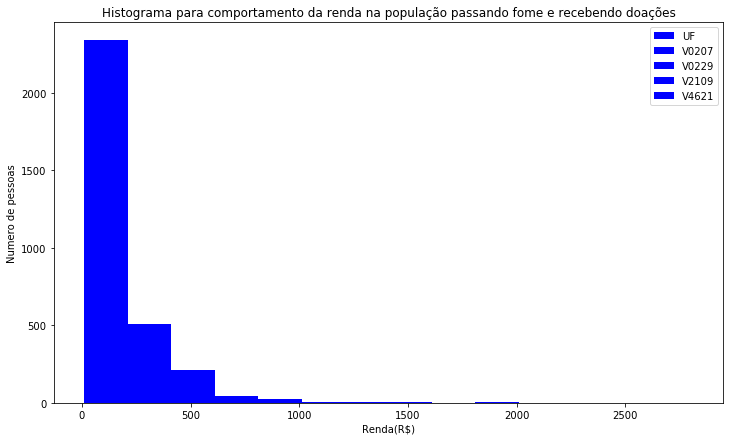

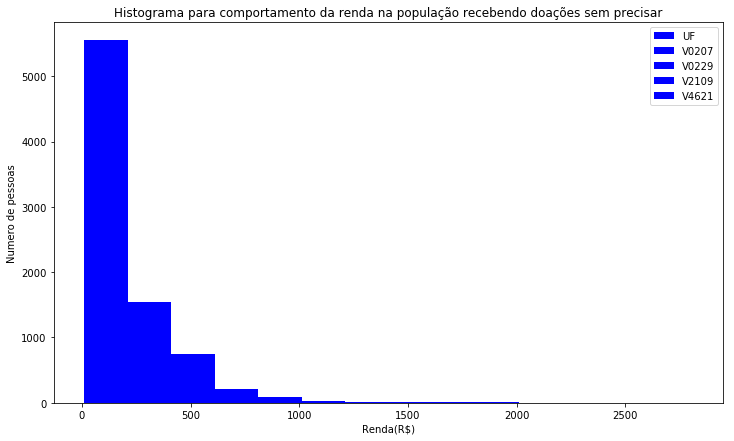

In [653]:
rendaFomeRecebe=rendaFome
rendaFomeRecebe.plot(kind='hist',bins = range(10,3000,200),  figsize=(12,7), color=("Blue"))
plt.title('Histograma para comportamento da renda na população passando fome e recebendo doações')
plt.xlabel('Renda(R$)')
plt.ylabel("Numero de pessoas")
rendaRecebe=rendaRecebe
rendaRecebe.plot(kind='hist',bins = range(10,3000,200),  figsize=(12,7), color=("Blue"))
plt.title('Histograma para comportamento da renda na população recebendo doações sem precisar')
plt.xlabel('Renda(R$)')
plt.ylabel("Numero de pessoas")

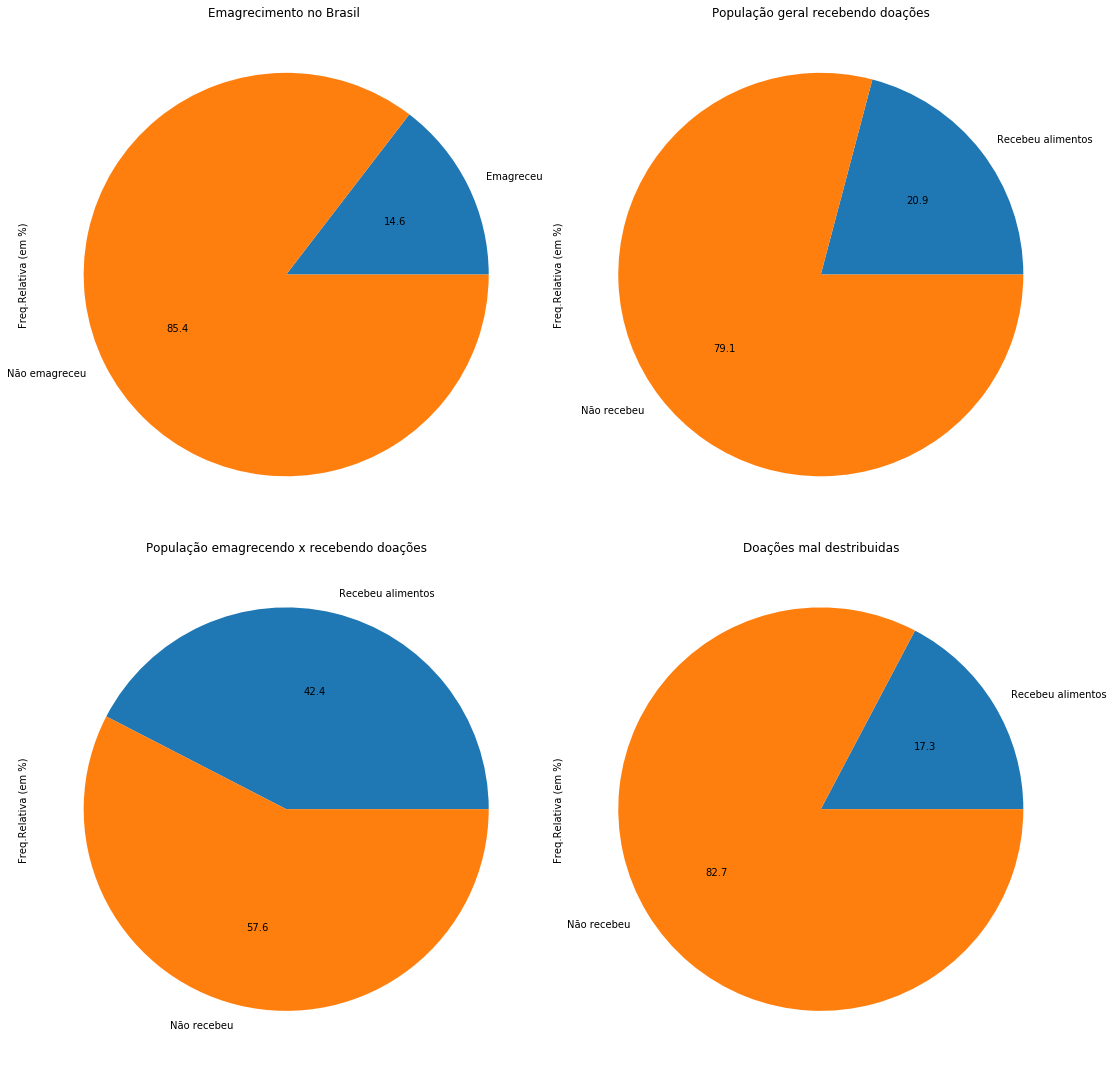

In [654]:
fig = plt.figure(figsize=(15, 15))

###########################################################################################################################
recebendo = (dadosCompletos.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = recebendo.plot(kind='pie',title='População geral recebendo doações',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')

fomeMagro = (dadosCompletos.V2119.value_counts(sort=False, normalize=True)*100)#.round(decimals=1)
plt.subplot(221)
plot = fomeMagro.plot(kind='pie',title='Emagrecimento no Brasil ',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')



fome = (dadosMagros.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = fome.plot(kind='pie',title='População emagrecendo x recebendo doações',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
###########################################################################################################################
semfome = (dadosNaoMagros.V2136.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(224)
plot = semfome.plot(kind='pie',title='Doações mal destribuidas',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')
###########################################################################################################################


plt.tight_layout()
plt.show()

___
## Conclusão 

Com base resultada gerados por essa analise pude concluir que, apenas 42.4% das pessoas que perderam peso por falta de condições financeiras receberam algum tipo de doação de alimento, sendo que, o número de pessoas recebendo doações de alimentos em 2009 superou o número de pessoas que perderam peso por falta de condições financeiras para comer. Assim podendo notar uma má destribuição de alimentos. Contudo, ao observar os Histogramas das rendas referentes as populações que emagreceram e receberam doações de alimentos, e das populações que NÃO emagreceram e receberam doações de alimento, pude notar que as suas rendas eram muito similares, portanto as duas necessitavam dessas doações alimentares.
Assim pude concluir que bastaria mais que uma melhoria na distribuição de doações para subir a fome no Brasil.

